# Cyclistic bike-share analysis 

In 2016, Cyclistic successfully launched a bike-share program, which has grown over time to include 5,824 geotracked bicycles stationed at 692 locations across Chicago. These bikes can be unlocked at one station and returned to any other station within the system, providing users with convenient mobility options.

Up until now, Cyclistic's marketing strategy focused on creating general awareness and targeting broad consumer segments. Their pricing plans, including single-ride passes, full-day passes, and annual memberships, played a significant role in making this possible. Customers who opt for single-ride or full-day passes are referred to as casual riders, while those who purchase annual memberships are known as Cyclistic members.

Financial analysts at Cyclistic have found that annual members are much more profitable compared to casual riders. Although the flexible pricing options have helped attract a larger customer base, a member of the finance team, believes that the key to future growth lies in maximizing the number of annual members. Instead of targeting all-new customers with a marketing campaign, shee sees an opportunity to convert casual riders into annual members. These casual riders are already familiar with the Cyclistic program and have chosen it for their transportation needs.

The objective is clear: to design marketing strategies aimed at converting casual riders into annual members. To achieve this goal, the marketing analyst team needs to gain a deeper understanding of the differences between annual members and casual riders, the reasons why casual riders might be interested in purchasing a membership, and how digital media can influence their marketing tactics. 

**In order to help the company in designing the strategy, in this analysis we will identify how annual members and casual riders use Cyclistic bikes differently.**

## Import Libraries

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Data collection

In this section, we extracted the data from a public dataset located [here](https://divvy-tripdata.s3.amazonaws.com/index.html)

In [5]:
# We extracted the urls to dowloand the datasets for the last 12 months
file_urls = [
    "https://divvy-tripdata.s3.amazonaws.com/202207-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202208-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202209-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202210-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202211-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202212-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202301-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202302-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202303-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202304-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202305-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202306-divvy-tripdata.zip",
]

In [6]:
# Directory to store the downloaded and unzipped files
download_dir = "./extracted_trip_data/"

# Create the directory if it does not exist
os.makedirs(download_dir, exist_ok=True)

# Function to download and unzip the file
for url in file_urls:
    file_name = url.split('/')[-1]
    download_path = os.path.join(download_dir, file_name)
    
    response = requests.get(url)
    with open(download_path, 'wb') as file:
        file.write(response.content)
    with zipfile.ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(download_dir)
    
    os.remove(download_path)
    print(f"{file_name} downloaded and unzipped successfully.")
    
print("Extraction complete!")

202207-divvy-tripdata.zip downloaded and unzipped successfully.
202208-divvy-tripdata.zip downloaded and unzipped successfully.
202209-divvy-tripdata.zip downloaded and unzipped successfully.
202210-divvy-tripdata.zip downloaded and unzipped successfully.
202211-divvy-tripdata.zip downloaded and unzipped successfully.
202212-divvy-tripdata.zip downloaded and unzipped successfully.
202301-divvy-tripdata.zip downloaded and unzipped successfully.
202302-divvy-tripdata.zip downloaded and unzipped successfully.
202303-divvy-tripdata.zip downloaded and unzipped successfully.
202304-divvy-tripdata.zip downloaded and unzipped successfully.
202305-divvy-tripdata.zip downloaded and unzipped successfully.
202306-divvy-tripdata.zip downloaded and unzipped successfully.
Extraction complete!


In [7]:
# Create a list of DataFrame objects to store the data from each file
dataframes = []

# Loop through the unzipped files, read them into DataFrames, and append them to the list
for file in os.listdir(download_dir):
    file_path = os.path.join(download_dir, file)
    if file.endswith(".csv"):
        df = pd.read_csv(file_path)
        dataframes.append(df)
        
# Print information about the downloaded files and created DataFrames
print(f"Created {len(dataframes)} dataFrames. One per each unzipped file")


Created 12 dataFrames. One per each unzipped file


## Data preprocessing

### Combining the separeted datasets into one

Before combining all the datasets into only one, it is needed to ensure the columns (names and dtype) are the same in all of them.

In [8]:
for df in dataframes:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785932 entries, 0 to 785931
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             785932 non-null  object 
 1   rideable_type       785932 non-null  object 
 2   started_at          785932 non-null  object 
 3   ended_at            785932 non-null  object 
 4   start_station_name  673895 non-null  object 
 5   start_station_id    673895 non-null  object 
 6   end_station_name    665410 non-null  object 
 7   end_station_id      665410 non-null  object 
 8   start_lat           785932 non-null  float64
 9   start_lng           785932 non-null  float64
 10  end_lat             785089 non-null  float64
 11  end_lng             785089 non-null  float64
 12  member_casual       785932 non-null  object 
dtypes: float64(4), object(9)
memory usage: 78.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258678 entries, 0 to 258677
Data col

Since the data_frames have the same structure, now we combine them

In [9]:
if dataframes:
    bike_trips_df = pd.concat(dataframes, ignore_index=True)
    print("Combined DataFrame:")
    print(f"- Shape: {bike_trips_df.shape}\n")
    print(bike_trips_df.head())
    
else:
    print("No data frames extracted.")

Combined DataFrame:
- Shape: (5779444, 13)

            ride_id  rideable_type           started_at             ended_at  \
0  550CF7EFEAE0C618  electric_bike  2022-08-07 21:34:15  2022-08-07 21:41:46   
1  DAD198F405F9C5F5  electric_bike  2022-08-08 14:39:21  2022-08-08 14:53:23   
2  E6F2BC47B65CB7FD  electric_bike  2022-08-08 15:29:50  2022-08-08 15:40:34   
3  F597830181C2E13C  electric_bike  2022-08-08 02:43:50  2022-08-08 02:58:53   
4  0CE689BB4E313E8D  electric_bike  2022-08-07 20:24:06  2022-08-07 20:29:58   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              NaN              NaN            NaN   
3                NaN              NaN              NaN            NaN   
4                NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  en

### Data cleaning

#### Handling missing data

First, we reviewed if there are null values in the dataset

In [10]:
#Calculating the number of null values per each column
bike_trips_df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    857860
start_station_id      857992
end_station_name      915655
end_station_id        915796
start_lat                  0
start_lng                  0
end_lat                 5795
end_lng                 5795
member_casual              0
dtype: int64

Since we found null values, we should see how representative they are

In [11]:
#Calculating the % of null values per each column in relation to the total number of rows.
bike_trips_df.isna().sum()/bike_trips_df.shape[0] * 100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.843296
start_station_id      14.845580
end_station_name      15.843306
end_station_id        15.845746
start_lat              0.000000
start_lng              0.000000
end_lat                0.100269
end_lng                0.100269
member_casual          0.000000
dtype: float64

In [12]:
#Calculating the number of non-null values per each column.
bike_trips_df.shape[0]-bike_trips_df.isna().sum()

ride_id               5779444
rideable_type         5779444
started_at            5779444
ended_at              5779444
start_station_name    4921584
start_station_id      4921452
end_station_name      4863789
end_station_id        4863648
start_lat             5779444
start_lng             5779444
end_lat               5773649
end_lng               5773649
member_casual         5779444
dtype: int64

**As the null values represents between 14% to 16% of the total data, we may infere that there is a lot of missing data. However, the completed data contains more than 5 millions of observation, so we can avoid using the rows with null values, deleting them.**

In [13]:
#Delete of rows with null values
bike_trips_df.dropna(axis=0, inplace=True)
bike_trips_df.isna().sum()
print("Null values deleted")
print(f"Actual amount of observations: {bike_trips_df.shape[0]}")

Null values deleted
Actual amount of observations: 4409089


#### Handling duplicated data

We verify if the dataset contains duplicated observations. If so, we delete them.

In [14]:
bike_trips_df[bike_trips_df.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


**No duplicated values were found**

In [15]:
bike_trips_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.791568,-87.607852,41.803038,-87.606615,casual
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673,-87.672075,41.895634,-87.672069,casual
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual


In [16]:
bike_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409089 entries, 142 to 5779443
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 470.9+ MB


### Data transformation

Transformation of the started_at and ended_at columns to the datetime datatype

In [17]:
bike_trips_df['started_at'] = pd.to_datetime(bike_trips_df['started_at'], dayfirst = True)
bike_trips_df['ended_at'] = pd.to_datetime(bike_trips_df['ended_at'], dayfirst = True)

Creation a a new column with the ride time

In [18]:
# To calculate the ride time, we substract the columns ended_at minus started-at
bike_trips_df['ride_time'] = bike_trips_df['ended_at']-bike_trips_df['started_at']

#Then we transform the result into minutes
bike_trips_df['ride_time'] = bike_trips_df['ride_time'].dt.total_seconds() / 60

Creation of a new column with the ride distance in km

In [19]:
from haversine import haversine, Unit

def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    distance_km = haversine(start_coords, end_coords, unit=Unit.KILOMETERS)
    return distance_km

bike_trips_df['distance_km'] = bike_trips_df.apply(calculate_distance, axis=1)

Creation of new columns: date, day, month, year, weekday name and hour

In [20]:
from datetime import datetime

bike_trips_df['date']=bike_trips_df['started_at'].dt.strftime('%Y-%m-%d')
bike_trips_df['day']=bike_trips_df['started_at'].dt.strftime('%d')
bike_trips_df['month']=bike_trips_df['started_at'].dt.strftime('%m')
bike_trips_df['year']=bike_trips_df['started_at'].dt.strftime('%Y')
bike_trips_df['day_name']=bike_trips_df['started_at'].dt.strftime('%A')
bike_trips_df['hour']=bike_trips_df['started_at'].dt.strftime('%H')

bike_trips_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_time,distance_km,date,day,month,year,day_name,hour
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.791568,-87.607852,...,-87.606615,casual,9.066667,1.279523,2022-08-05,05,08,2022,Friday,16
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,...,-87.697153,casual,0.750000,0.000000,2022-08-11,11,08,2022,Thursday,23
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,...,-87.697474,casual,61.633333,0.000000,2022-08-21,21,08,2022,Sunday,14
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673,-87.672075,...,-87.672069,casual,14.300000,0.004403,2022-08-21,21,08,2022,Sunday,16
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,...,-87.697153,casual,92.633333,0.000000,2022-08-21,21,08,2022,Sunday,02


#### Handling incongruent ride time

All observations with ride_time <= 0 are incongruent, since any trip should last at least one minute.

First, we identify how many observations fall into the incongruent situation:

In [21]:
# Calculating the number of observations to be eliminated
bike_trips_df[bike_trips_df['ride_time']<=0].shape[0]

339

Since the number is low, we delete the observations from the dataframe

In [22]:
bike_trips_df = bike_trips_df[bike_trips_df['ride_time']>0]
print(f"Actual amount of observations: {bike_trips_df.shape[0]}")

Actual amount of observations: 4408750


### Outliers detection

In [23]:
# Creation of a subset with only the relevant data
selected_columns = ['distance_km', 'ride_time']
data_subset = bike_trips_df[selected_columns]
data_subset.head()

,distance_km,ride_time
142,1.279523,9.066667
271,0.000000,0.750000
329,0.000000,61.633333
357,0.004403,14.300000
422,0.000000,92.633333


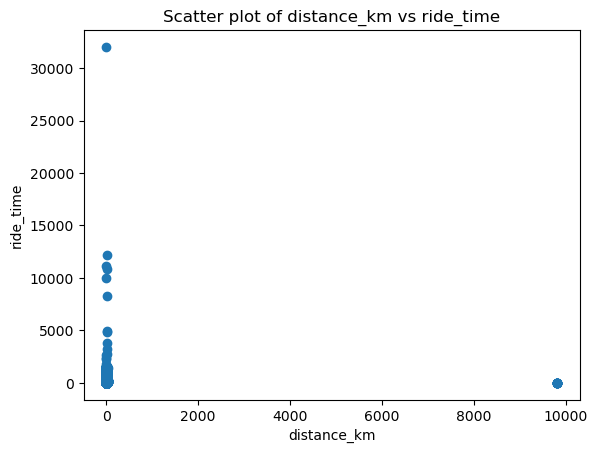

In [24]:
# Scatter plot
plt.scatter(data_subset['distance_km'], data_subset['ride_time'])
plt.xlabel('distance_km')
plt.ylabel('ride_time')
plt.title('Scatter plot of distance_km vs ride_time')
plt.show()

The plot above shows that there are many observations with abnormal distance from most of the population

In [25]:
from scipy import stats

# Identification of anomalies using Z-score
z_scores = np.abs(stats.zscore(data_subset))
threshold = 3
anomalies_zscore = data_subset[(z_scores > threshold).any(axis=1)]
print(f'The anomalies represent {round(100*anomalies_zscore.shape[0]/bike_trips_df.shape[0],2)} % of the total population.')
print('A few examples below:')
anomalies_zscore.head()

The anomalies represent 0.61 % of the total population.
A few examples below:


,distance_km,ride_time
2151,0.000000,134.450000
2325,0.000000,128.533333
6702,0.000000,189.800000
8578,0.000000,944.166667
8910,2.186924,1191.966667


In [26]:
# Removing the anomalies from the data_subset and bike_trips_df
non_anomalies_zscore = data_subset[~data_subset.index.isin(anomalies_zscore.index)]
bike_trips_df = bike_trips_df[~bike_trips_df.index.isin(anomalies_zscore.index)]

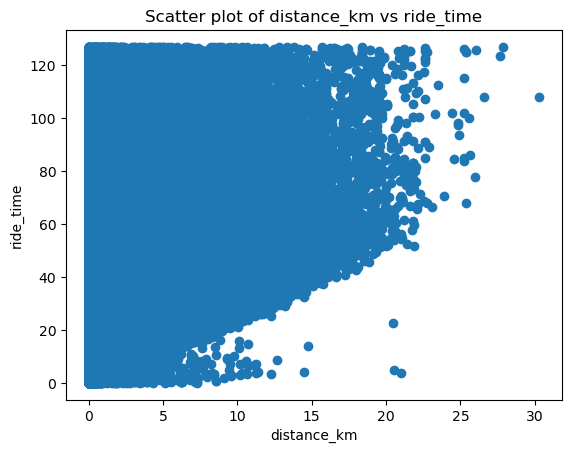

In [27]:
# Scatter plot of non-anomaly data
plt.scatter(non_anomalies_zscore['distance_km'], non_anomalies_zscore['ride_time'])
plt.xlabel('distance_km')
plt.ylabel('ride_time')
plt.title('Scatter plot of distance_km vs ride_time')
plt.show()

## Data Analysis with visualizations

#### Overall average ride time and distance, and total rides per member/casual type

In [28]:
# Calculation of the average distance for each category (member_casual)
avg_ride_time_by_usertype = bike_trips_df.groupby('member_casual')['ride_time'].mean()

# Calculation of the average distance for each category (member_casual)
avg_distance_by_usertype = bike_trips_df.groupby('member_casual')['distance_km'].mean()

# Calculation of the average distance for each category (member_casual)
total_rides_by_usertype = bike_trips_df.groupby('member_casual').size()
#total_rides_df = total_rides_df.reset_index(name='count')

riding_time_greater_percentage = round(100 * (avg_ride_time_by_usertype[0] / 
                                              avg_ride_time_by_usertype[1] - 1),2)
riding_distance_greater_percentage = round(100 * (avg_distance_by_usertype[0] / 
                                                  avg_distance_by_usertype[1] - 1),2)
total_rides_greater_percentage = round(100 * (total_rides_by_usertype[1] / 
                                                  total_rides_by_usertype[0] - 1),2)

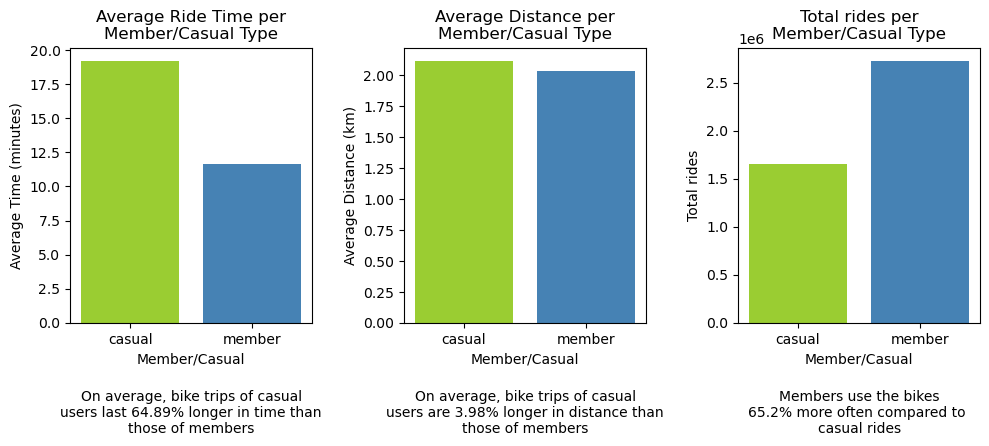

In [29]:
# Plot of the average time and distance group by member/casual type

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# First subplot
axes[0].bar(avg_ride_time_by_usertype.index, avg_ride_time_by_usertype.values, color=['yellowgreen', 
                                                                                      'steelblue'])
axes[0].set_xlabel('Member/Casual')
axes[0].set_ylabel('Average Time (minutes)')
axes[0].set_title('Average Ride Time per\nMember/Casual Type')

# Comment of the first plot
axes[0].text(0.5, -0.4, 'On average, bike trips of casual\n' 
             f'users last {riding_time_greater_percentage}% longer in time than\n'
             'those of members', 
             ha='center', transform=axes[0].transAxes, fontsize=10)

# Second subplot
axes[1].bar(avg_distance_by_usertype.index, avg_distance_by_usertype.values, color=['yellowgreen', 
                                                                                    'steelblue'])
axes[1].set_xlabel('Member/Casual')
axes[1].set_ylabel('Average Distance (km)')
axes[1].set_title('Average Distance per\nMember/Casual Type')

# Comment of the second plot
axes[1].text(0.5, -0.4, 'On average, bike trips of casual\n' 
             f'users are {riding_distance_greater_percentage}% longer in distance than\n'
             'those of members',
             ha='center', transform=axes[1].transAxes, fontsize=10)


# Third subplot
axes[2].bar(total_rides_by_usertype.index, total_rides_by_usertype.values, color=['yellowgreen', 
                                                                                    'steelblue'])
axes[2].set_xlabel('Member/Casual')
axes[2].set_ylabel('Total rides')
axes[2].set_title('Total rides per\nMember/Casual Type')

# Comment of the third plot
axes[2].text(0.5, -0.4, 'Members use the bikes\n' 
             f'{total_rides_greater_percentage}% more often compared to \n'
             'casual rides',
             ha='center', transform=axes[2].transAxes, fontsize=10)

plt.tight_layout()
plt.show()

- In the first two graphs above, we note that on average, casual riders use the bikes for longer periods than members. However, when it comes to riding distance, the performance is similar.

- On the other hand, the third graph above shows that members do more trips than casual rides.

#### Dayly average perfomance of ride time and distance, and total rides per member/casual type

In [30]:
# Group by 'member_casual' and 'date', calculate the average ride time for each group
average_time_df = bike_trips_df.groupby(['date', 'member_casual'])['ride_time'].mean().reset_index()
# Group by 'member_casual' and 'date', calculate the average distance for each group
average_distance_df = bike_trips_df.groupby(['date', 'member_casual'])['distance_km'].mean().reset_index()
# Group by 'member_casual' and 'date', calculate the total rides for each group
total_rides_df = bike_trips_df.groupby(['date', 'member_casual']).size()
total_rides_df = total_rides_df.reset_index(name='count')

# Create separate DataFrames for 'Member' and 'Casual' data
member_time = average_time_df[average_time_df['member_casual'] == 'member']
casual_time = average_time_df[average_time_df['member_casual'] == 'casual']
member_distance = average_distance_df[average_distance_df['member_casual'] == 'member']
casual_distance = average_distance_df[average_distance_df['member_casual'] == 'casual']
member_rides = total_rides_df[total_rides_df['member_casual'] == 'member']
casual_rides = total_rides_df[total_rides_df['member_casual'] == 'casual']

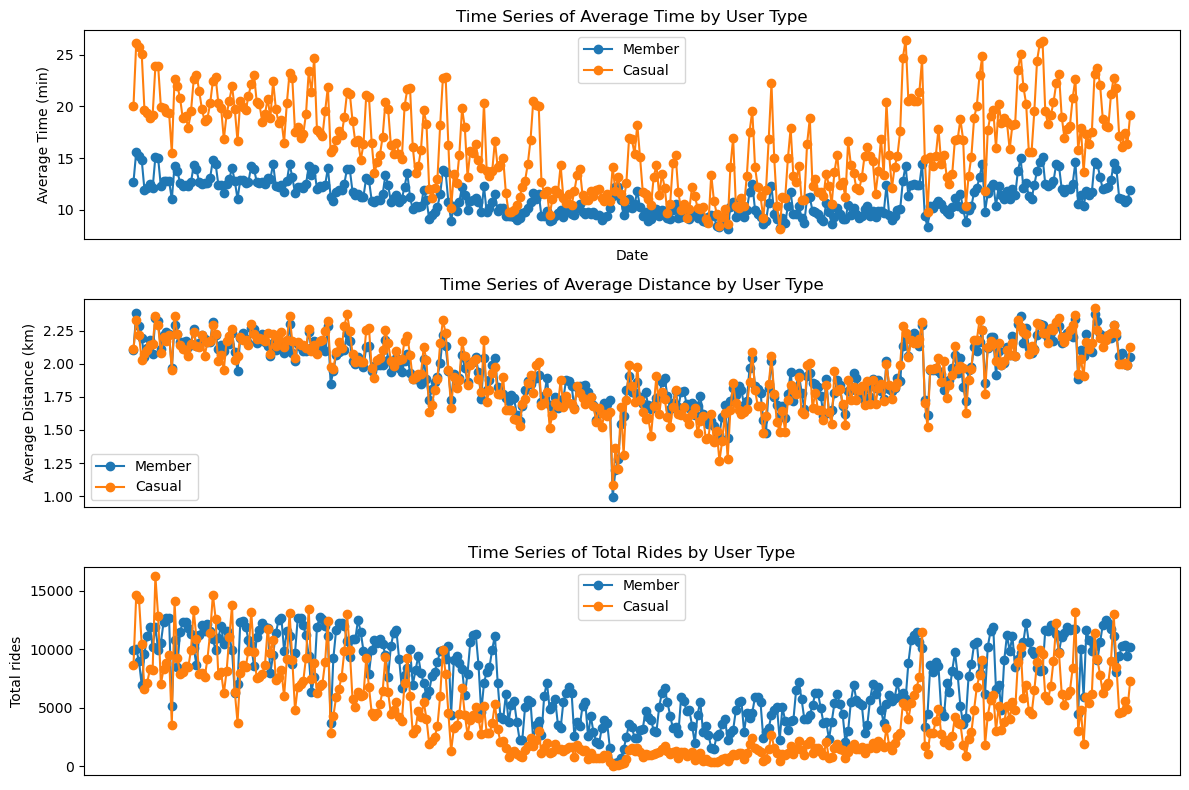

In [31]:
# Create a figure with three subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# First subplot
axes[0].plot(member_time['date'], member_time['ride_time'], label='Member', marker='o')
axes[0].plot(casual_time['date'], casual_time['ride_time'], label='Casual', marker='o')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Time (min)')
axes[0].set_title('Time Series of Average Time by User Type')
axes[0].legend()

# Second subplot
axes[1].plot(member_distance['date'], member_distance['distance_km'], label='Member', marker='o')
axes[1].plot(casual_distance['date'], casual_distance['distance_km'], label='Casual', marker='o')
axes[1].set_ylabel('Average Distance (km)')
axes[1].set_title('Time Series of Average Distance by User Type')
axes[1].legend()

# Third subplot
axes[2].plot(member_rides['date'], member_rides['count'], label='Member', marker='o')
axes[2].plot(casual_rides['date'], casual_rides['count'], label='Casual', marker='o')
axes[2].set_ylabel('Total rides')
axes[2].set_title('Time Series of Total Rides by User Type')
axes[2].legend()


plt.xticks([])
plt.tight_layout()
plt.show()

- Both time series confirm what we stated in the previous overall analysis: the use of the bikes in terms of distance is similar, while casual users ride for longer periods than members.

- Also, members use the bikes more often, which can be seen mainly in the middle area of the last graph.

#### Monthly average perfomance of ride time and distance per member/casual type

In [32]:
# Group by 'member_casual' and 'month', calculate the average ride time for each group
mean_time_by_month_df = bike_trips_df.groupby(['year', 'month', 'member_casual'])['ride_time'].mean().reset_index()
# Group by 'member_casual' and 'month', calculate the average ride distance for each group
mean_dist_by_month_df = bike_trips_df.groupby(['year', 'month', 'member_casual'])['distance_km'].mean().reset_index()
# Group by 'member_casual' and 'month', calculate the total rides for each group
total_rides_by_month_df = bike_trips_df.groupby(['year', 'month', 'member_casual']).size()
total_rides_by_month_df = total_rides_by_month_df.reset_index(name='count')

# Create separate DataFrames for 'Member' and 'Casual' data
member_time = mean_time_by_month_df[mean_time_by_month_df['member_casual'] == 'member']
casual_time = mean_time_by_month_df[mean_time_by_month_df['member_casual'] == 'casual']
member_distance = mean_dist_by_month_df[mean_dist_by_month_df['member_casual'] == 'member']
casual_distance = mean_dist_by_month_df[mean_dist_by_month_df['member_casual'] == 'casual']
member_rides = total_rides_by_month_df[total_rides_by_month_df['member_casual'] == 'member']
casual_rides = total_rides_by_month_df[total_rides_by_month_df['member_casual'] == 'casual']

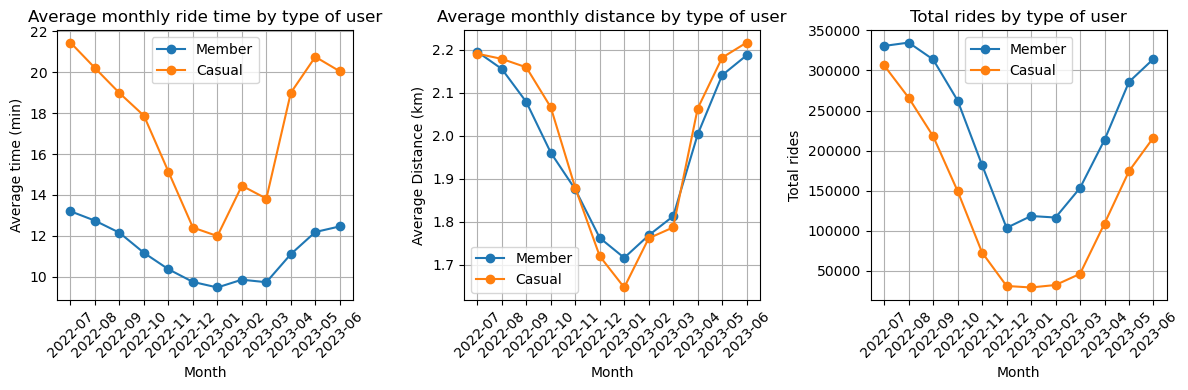

In [33]:
# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

# First subplot
axes[0].plot(member_time['year']+"-"+member_time['month'], member_time['ride_time'], label='Member', marker='o')
axes[0].plot(casual_time['year']+"-"+casual_time['month'], casual_time['ride_time'], label='Casual', marker='o')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average time (min)')
axes[0].set_title('Average monthly ride time by type of user')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Second subplot
axes[1].plot(member_distance['year']+"-"+member_distance['month'], member_distance['distance_km'], label='Member', marker='o')
axes[1].plot(casual_distance['year']+"-"+casual_distance['month'], casual_distance['distance_km'], label='Casual', marker='o')
axes[1].set_ylabel('Average Distance (km)')
axes[1].set_xlabel('Month')
axes[1].set_title('Average monthly distance by type of user')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Third subplot
axes[2].plot(member_rides['year']+"-"+member_rides['month'], member_rides['count'], label='Member', marker='o')
axes[2].plot(casual_rides['year']+"-"+casual_rides['month'], casual_rides['count'], label='Casual', marker='o')
axes[2].set_ylabel('Total rides')
axes[2].set_xlabel('Month')
axes[2].set_title('Total rides by type of user')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

plt.tight_layout()
plt.show()


- In the first graph above, we can see that casual users ride for longer periods in all months, being the periods from 2022-07 to 2022-09 and 2023-04 to 2023-06 with more difference. While in the second plot, in terms of distance, the performance is similar over the 12 months.

- Additionally, as we discussed previously, members use the bikes more often than casual rides in every month according to the last graph.

#### Average perfomance of ride time and distance per member/casual type grouped by day name

In [34]:
# Group by 'member_casual' and 'day name', calculate the average ride time for each group
mean_time_by_dayname_df = bike_trips_df.groupby(['day_name', 'member_casual'])['ride_time'].mean().reset_index()
# Group by 'member_casual' and 'day name', calculate the average ride distance for each group
mean_dist_by_dayname_df = bike_trips_df.groupby(['day_name', 'member_casual'])['distance_km'].mean().reset_index()
# Group by 'member_casual' and 'day name', calculate the total rides for each group
total_rides_by_dayname_df = bike_trips_df.groupby(['day_name', 'member_casual']).size()
total_rides_by_dayname_df = total_rides_by_dayname_df.reset_index(name='count')

# Order the created subdatasets by day_name
custom_order_day_name = ['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']  # Replace with your desired order
mean_time_by_dayname_df['day_name'] = mean_time_by_dayname_df['day_name'].astype('category')
mean_time_by_dayname_df['day_name'].cat.reorder_categories(custom_order_day_name, inplace=True)
mean_time_by_dayname_df.sort_values(['day_name'], inplace=True)
mean_dist_by_dayname_df['day_name'] = mean_dist_by_dayname_df['day_name'].astype('category')
mean_dist_by_dayname_df['day_name'].cat.reorder_categories(custom_order_day_name, inplace=True)
mean_dist_by_dayname_df.sort_values(['day_name'], inplace=True)
total_rides_by_dayname_df['day_name'] = total_rides_by_dayname_df['day_name'].astype('category')
total_rides_by_dayname_df['day_name'].cat.reorder_categories(custom_order_day_name, inplace=True)
total_rides_by_dayname_df.sort_values(['day_name'], inplace=True)

# Create separate DataFrames for 'Member' and 'Casual' data
member_time = mean_time_by_dayname_df[mean_time_by_dayname_df['member_casual'] == 'member']
casual_time = mean_time_by_dayname_df[mean_time_by_dayname_df['member_casual'] == 'casual']
member_distance = mean_dist_by_dayname_df[mean_dist_by_dayname_df['member_casual'] == 'member']
casual_distance = mean_dist_by_dayname_df[mean_dist_by_dayname_df['member_casual'] == 'casual']
member_rides = total_rides_by_dayname_df[total_rides_by_dayname_df['member_casual'] == 'member']
casual_rides = total_rides_by_dayname_df[total_rides_by_dayname_df['member_casual'] == 'casual']

/var/folders/_4/y659jfkj29n2f6xjqqr3bl140000gn/T/ipykernel_57667/1669485529.py:12: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  mean_time_by_dayname_df['day_name'].cat.reorder_categories(custom_order_day_name, inplace=True)
/var/folders/_4/y659jfkj29n2f6xjqqr3bl140000gn/T/ipykernel_57667/1669485529.py:15: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  mean_dist_by_dayname_df['day_name'].cat.reorder_categories(custom_order_day_name, inplace=True)
/var/folders/_4/y659jfkj29n2f6xjqqr3bl140000gn/T/ipykernel_57667/1669485529.py:18: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categ

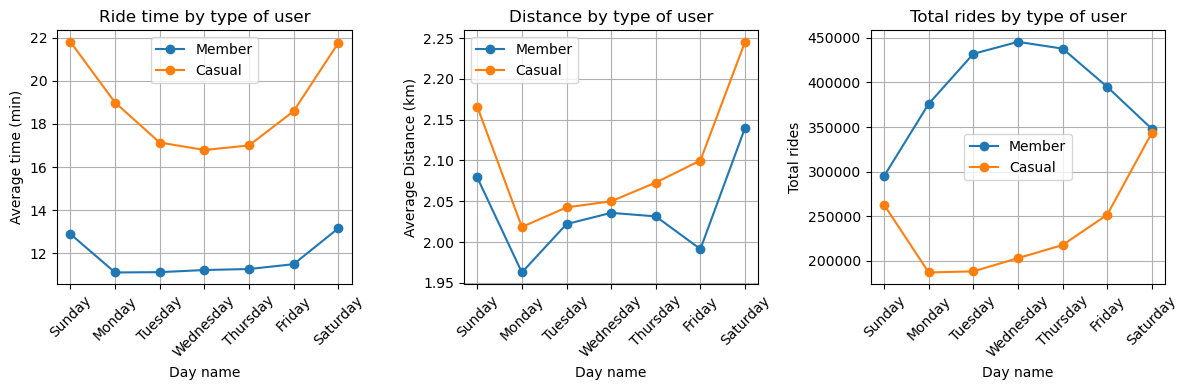

In [35]:
# Create a figure with three subplots (3 rows, 1 column)
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

# First  subplot
axes[0].plot(member_time['day_name'], member_time['ride_time'], label='Member', marker='o')
axes[0].plot(casual_time['day_name'], casual_time['ride_time'], label='Casual', marker='o')
axes[0].set_xlabel('Day name')
axes[0].set_ylabel('Average time (min)')
axes[0].set_title('Ride time by type of user')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Second  subplot
axes[1].plot(member_distance['day_name'], member_distance['distance_km'], label='Member', marker='o')
axes[1].plot(casual_distance['day_name'], casual_distance['distance_km'], label='Casual', marker='o')
axes[1].set_ylabel('Average Distance (km)')
axes[1].set_xlabel('Day name')
axes[1].set_title('Distance by type of user')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Third  subplot
axes[2].plot(member_rides['day_name'], member_rides['count'], label='Member', marker='o')
axes[2].plot(casual_rides['day_name'], casual_rides['count'], label='Casual', marker='o')
axes[2].set_ylabel('Total rides')
axes[2].set_xlabel('Day name')
axes[2].set_title('Total rides by type of user')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)


plt.tight_layout()
plt.show()

- In the graphs above, we don't identify any specific trend regarding the ride duration and distance in the differents days of the week.

- However, the diference in the numbers of total rides during weekend days is very similar, while members ride more often during weekdays.

#### Average perfomance of ride time and distance per member/casual type grouped by day of the month

In [36]:
# Group by 'member_casual' and 'day', calculate the average ride time for each group
mean_time_by_day_df = bike_trips_df.groupby(['day', 'member_casual'])['ride_time'].mean().reset_index()
# Group by 'member_casual' and 'day', calculate the average ride distance for each group
mean_dist_by_day_df = bike_trips_df.groupby(['day', 'member_casual'])['distance_km'].mean().reset_index()
# Group by 'member_casual' and 'day', calculate the total rides for each group
total_rides_by_day_df = bike_trips_df.groupby(['day', 'member_casual']).size()
total_rides_by_day_df = total_rides_by_day_df.reset_index(name='count')

# Create separate DataFrames for 'Member' and 'Casual' data
member_time = mean_time_by_day_df[mean_time_by_day_df['member_casual'] == 'member']
casual_time = mean_time_by_day_df[mean_time_by_day_df['member_casual'] == 'casual']
member_distance = mean_dist_by_day_df[mean_dist_by_day_df['member_casual'] == 'member']
casual_distance = mean_dist_by_day_df[mean_dist_by_day_df['member_casual'] == 'casual']
member_rides = total_rides_by_day_df[total_rides_by_day_df['member_casual'] == 'member']
casual_rides = total_rides_by_day_df[total_rides_by_day_df['member_casual'] == 'casual']

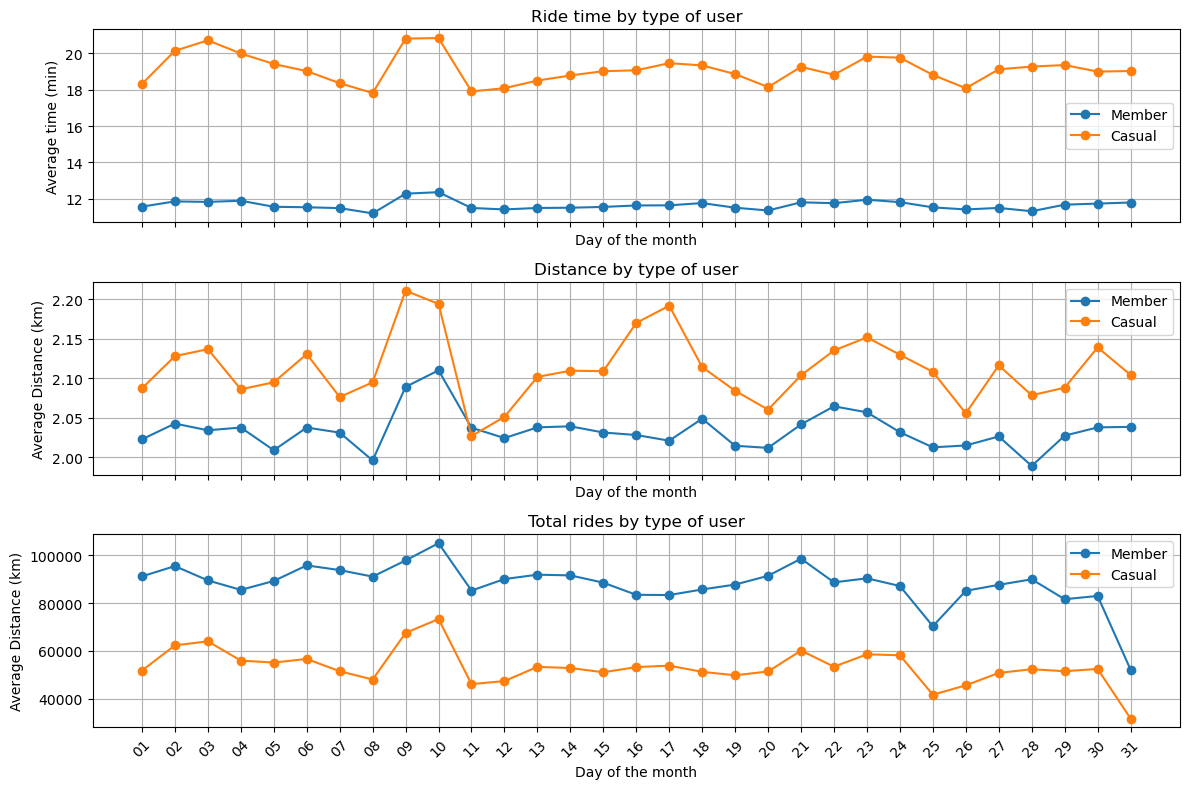

In [37]:
# Create a figure with three subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# First  subplot
axes[0].plot(member_time['day'], member_time['ride_time'], label='Member', marker='o')
axes[0].plot(casual_time['day'], casual_time['ride_time'], label='Casual', marker='o')
axes[0].set_xlabel('Day of the month')
axes[0].set_ylabel('Average time (min)')
axes[0].set_title('Ride time by type of user')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Second  subplot
axes[1].plot(member_distance['day'], member_distance['distance_km'], label='Member', marker='o')
axes[1].plot(casual_distance['day'], casual_distance['distance_km'], label='Casual', marker='o')
axes[1].set_ylabel('Average Distance (km)')
axes[1].set_xlabel('Day of the month')
axes[1].set_title('Distance by type of user')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Third  subplot
axes[2].plot(member_rides['day'], member_rides['count'], label='Member', marker='o')
axes[2].plot(casual_rides['day'], casual_rides['count'], label='Casual', marker='o')
axes[2].set_ylabel('Average Distance (km)')
axes[2].set_xlabel('Day of the month')
axes[2].set_title('Total rides by type of user')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

plt.tight_layout()
plt.show()

- The trends observed in the previous sections are mantain in the graphs above. Also, althought there is a gap between the curves in each graph, the performance (rises and falls) are similar.

#### Hourly average perfomance of ride time and distance per member/casual type

In [38]:
# Group by 'member_casual' and 'hour', calculate the average ride time for each group
mean_time_by_hour_df = bike_trips_df.groupby(['hour', 'member_casual'])['ride_time'].mean().reset_index()
# Group by 'member_casual' and 'hour', calculate the average ride distance for each group
mean_dist_by_hour_df = bike_trips_df.groupby(['hour', 'member_casual'])['distance_km'].mean().reset_index()
# Group by 'member_casual' and 'day', calculate the total rides for each group
total_rides_by_hour_df = bike_trips_df.groupby(['hour', 'member_casual']).size()
total_rides_by_hour_df = total_rides_by_hour_df.reset_index(name='count')

# Create separate DataFrames for 'Member' and 'Casual' data
member_time = mean_time_by_hour_df[mean_time_by_hour_df['member_casual'] == 'member']
casual_time = mean_time_by_hour_df[mean_time_by_hour_df['member_casual'] == 'casual']
member_distance = mean_dist_by_hour_df[mean_dist_by_hour_df['member_casual'] == 'member']
casual_distance = mean_dist_by_hour_df[mean_dist_by_hour_df['member_casual'] == 'casual']
member_rides = total_rides_by_hour_df[total_rides_by_hour_df['member_casual'] == 'member']
casual_rides = total_rides_by_hour_df[total_rides_by_hour_df['member_casual'] == 'casual']

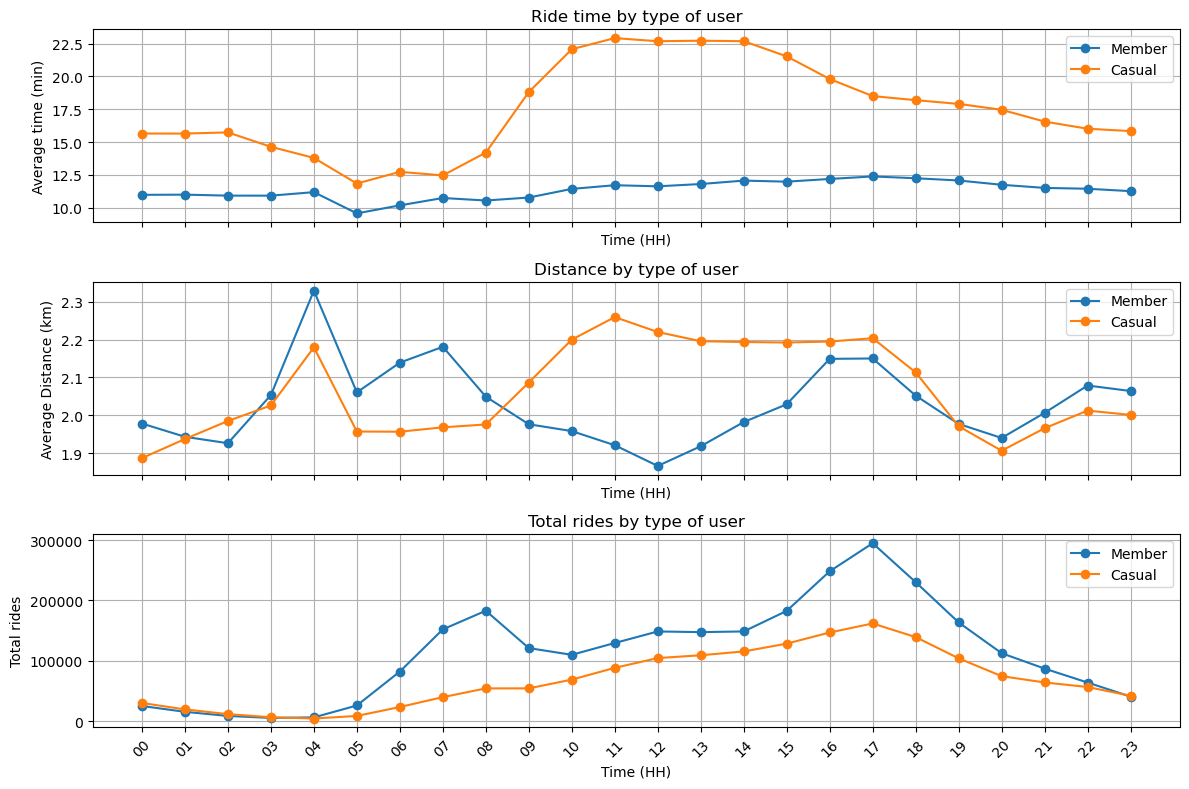

In [39]:
# Create a figure with three subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# First  subplot
axes[0].plot(member_time['hour'], member_time['ride_time'], label='Member', marker='o')
axes[0].plot(casual_time['hour'], casual_time['ride_time'], label='Casual', marker='o')
axes[0].set_xlabel('Time (HH)')
axes[0].set_ylabel('Average time (min)')
axes[0].set_title('Ride time by type of user')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Second  subplot
axes[1].plot(member_distance['hour'], member_distance['distance_km'], label='Member', marker='o')
axes[1].plot(casual_distance['hour'], casual_distance['distance_km'], label='Casual', marker='o')
axes[1].set_ylabel('Average Distance (km)')
axes[1].set_xlabel('Time (HH)')
axes[1].set_title('Distance by type of user')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Third  subplot
axes[2].plot(member_rides['hour'], member_rides['count'], label='Member', marker='o')
axes[2].plot(casual_rides['hour'], casual_rides['count'], label='Casual', marker='o')
axes[2].set_ylabel('Total rides')
axes[2].set_xlabel('Time (HH)')
axes[2].set_title('Total rides by type of user')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

plt.tight_layout()
plt.show()

- Casual users ride for longer time at any time.

- Members ride longer distances from 4:00 to 8:00, and after 20:00, while casual riders win during the rest of the day.

- Members use more often the bikes almost all day (from 5.00 to 21:00). The peak usage are from 7:00 to 8:00 and from 16:00 to 18:00.

### More frequent stations

In [40]:
# Calculation of the number of trips by started station and type of user
df = bike_trips_df.groupby(['start_station_name', 'member_casual']).size()
df = df.reset_index(name='count')

# Creation of casual_df by filtering by casual riders
casual_df = df[df['member_casual'] == 'casual']
# Creation of casual_df by filtering by members
members_df = df[df['member_casual'] == 'member']

# Sorting of both df by number of trips in descending order
casual_df = casual_df.sort_values(by='count', ascending=False)
members_df = members_df.sort_values(by='count', ascending=False)

# Printing of the top 20 of each df
print('\033[1m','Top 20 start stations most frequented by casual riders:\n')
print('\033[0m',casual_df.head(20).to_string(index=False))
print('\n\n\n')
print('\033[1m','Top 20 start stations most frequented by members:\n')
print('\033[0m',members_df.head(20).to_string(index=False))

 Top 20 start stations most frequented by casual riders:

                 start_station_name member_casual  count
           Streeter Dr & Grand Ave        casual  48669
 DuSable Lake Shore Dr & Monroe St        casual  28526
             Michigan Ave & Oak St        casual  21849
                   Millennium Park        casual  21157
DuSable Lake Shore Dr & North Blvd        casual  19983
                    Shedd Aquarium        casual  18268
               Theater on the Lake        casual  15851
             Wells St & Concord Ln        casual  13414
                    Dusable Harbor        casual  12919
        Indiana Ave & Roosevelt Rd        casual  11709
           Clark St & Armitage Ave        casual  11518
            Clark St & Lincoln Ave        casual  11070
                 Clark St & Elm St        casual  11000
                   Montrose Harbor        casual  10947
                 Adler Planetarium        casual  10515
                 Wells St & Elm St        cas

## Conclusions

- **Members use the bikes more often during weekdays compared to casual riders.**

- **The peak usage are from 7:00 to 8:00 and from 16:00 to 18:00, which is in line with communiting time from home to work and vice versa.**

- **Casual riders take less rides than members, but the duration and distance is longer on average.**

- **On non-winter months, the number of rides increases as well as the average duration and distance per trip. This increase is greater in casual riders.**

- **The most frequented station for casual riders is located on Streeter Dr & Grand Ave. Therefore, the company should place advertisements there and in the rest of the most frequested stations listed above.**